In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras.layers import DenseFeatures
 
train = pd.read_csv('aug_test.csv')

train, test = train_test_split(train, test_size=0.2, random_state=0)
train, val = train_test_split(train, test_size=0.2, random_state=0)

feature_columns = []
for numeric_col in ['enrollee_id', 'city_development_index', 'training_hours']:
    feature_columns.append(feature_column.numeric_column(numeric_col))

# 범주형 피처는 원핫인코딩
gender = feature_column.categorical_column_with_vocabulary_list('gender', ['Male', 'Female', 'Other'])
gender_one_hot = feature_column.indicator_column(gender)
feature_columns.append(gender_one_hot)

relevent_experience = feature_column.categorical_column_with_vocabulary_list('relevent_experience', ['Has relevent experience', 'No relevent experience'])
relevent_experience_one_hot = feature_column.indicator_column(relevent_experience)
feature_columns.append(relevent_experience_one_hot)

enrolled_university = feature_column.categorical_column_with_vocabulary_list('enrolled_university', ['no_enrollment', 'Full time course', 'Part time course'])
enrolled_university_one_hot = feature_column.indicator_column(enrolled_university)
feature_columns.append(enrolled_university_one_hot)

# 임베딩 열로 저차원의 데이터로 표현
education_level = feature_column.categorical_column_with_vocabulary_list('education_level', ['Graduate', 'High School', 'Masters', 'Primary School', 'Phd'])
education_level_embedding = feature_column.embedding_column(education_level, dimension=10)
feature_columns.append(education_level_embedding)

company_size = feature_column.categorical_column_with_vocabulary_list('company_size', ['50-99', '100-500', '10000+', '10/49', '1000-4999', '<10', '500-999', '5000-9999'])
company_size_embedding = feature_column.embedding_column(company_size, dimension=10)
feature_columns.append(company_size_embedding)

train, val, test = train.dropna(), val.dropna(), test.dropna()
def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    print(dataframe.columns)
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

batch_size = 32
train_ds = dataframe_to_dataset(train, batch_size = batch_size)
val_ds = dataframe_to_dataset(val, shuffle=False, batch_size = batch_size)
test_ds = dataframe_to_dataset(test, shuffle=False, batch_size = batch_size)


train_ds


Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')


KeyError: 'target'

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import os, pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

train_url = 'https://storage.googleapis.com/ibeans/train.zip'
validation_url = 'https://storage.googleapis.com/ibeans/validation.zip'

def get_data(fname, origin, extract):
    data_dir = get_file(fname=fname, origin=origin, extract=extract, cache_subdir='/content/drive/MyDrive/Colab Notebooks/data/ibeans')
    data_dir = os.path.join(os.path.dirname(data_dir))
    return data_dir

train_dir = get_data('train.zip', train_url, 'True')
validation_dir = get_data('validation.zip', validation_url, 'True')

train_ds = image_dataset_from_directory(directory=train_dir, batch_size=32, image_size=(256, 256), shuffle=True, seed=0)
validation_ds = image_dataset_from_directory(directory=validation_dir, batch_size=32, image_size=(256, 256), shuffle=True, seed=0)

# class_names = train_ds.class_names
# plt.figure(figsize=(15, 15))
# for images, labels in train_ds.take(1):
#     for i in range(25):
#         ax = plt.subplot(5, 5, i+1)
#         plt.imshow(images[i].numpy().astype('uint8'))
#         plt.title(class_names[labels[i]])
#         plt.axis('off')
        
        
model = Sequential([
    Rescaling(scale=1./255, input_shape=(256, 256, 3)),
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=3)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10)
checkpoint_model = ModelCheckpoint('ModelCheckPoint.h5')

history = model.fit(train_ds, validation_data=validation_ds, epochs=100, callbacks=[early_stopping, checkpoint_model])

from plotly.subplots import make_subplots
import plotly.graph_objects as go


Found 1167 files belonging to 2 classes.
Found 1167 files belonging to 2 classes.
Epoch 1/100
21/37 [================>.............] - ETA: 7s - loss: 0.4354 - accuracy: 0.8333

KeyboardInterrupt: 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,16391.428571,16494.285714,16148.571429,16320.000000,397234.428571,0.002010
2010-01-13,16397.142857,16485.571429,16140.000000,16285.714286,401284.142857,-0.001897
2010-01-14,16340.000000,16491.285714,16097.142857,16300.000000,397496.428571,0.001185


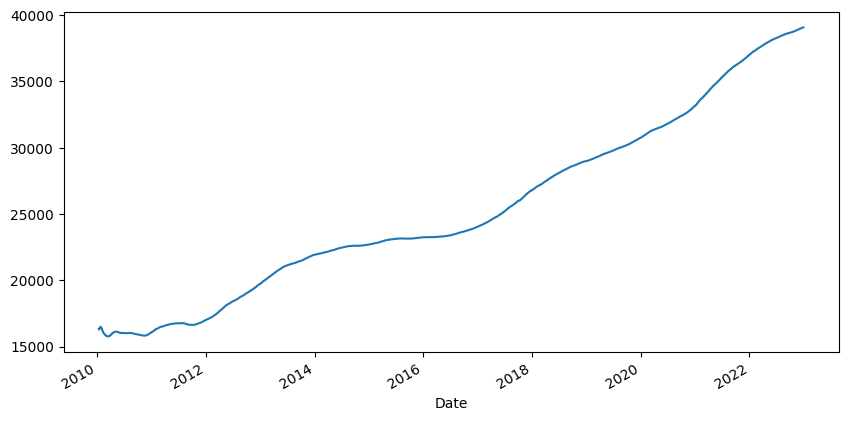

In [7]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
df_krx[df_krx['Name'] == '삼성전자']

df = fdr.DataReader('005930', '2010-01-01', '2022-12-31')
df['Close'].expanding(7).mean().plot(figsize=(10, 5)) #이동평균
df.rolling(window=7).mean().head(14)

In [26]:
import pandas_datareader.data as web
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

data = web.DataReader('035420', 'naver', start='2011-01-01', end='2022-06-30').astype('int')
#데이터 분할
train_df = data['2011-1':'2020-12'].copy()
val_df = data['2021-1':'2021-12'].copy()
test_df = data['2022-1':].copy()
#데이터 정규화
train_max = train_df.max()
train_min = train_df.min()
train_df = (train_df - train_min) / (train_max - train_df)
val_df = (val_df - train_min) / (train_max - val_df)
test_df = (test_df - train_min) / (train_max - test_df)

window_length = 7
x_train = train_df.values
y_train = train_df['Close'].iloc[window_length:]
train_ds = timeseries_dataset_from_array(x_train, y_train, sequence_length=window_length, batch_size=32)

for batch in train_ds.take(1):
    inputs, targets = batch
x_val = val_df.values
y_val = val_df['Close'].iloc[window_length:]
val_ds = timeseries_dataset_from_array(x_val, y_val, sequence_length=window_length, batch_size=32)

for batch in train_ds.take(1):
    inputs, targets = batch
    
inputs = Input(shape=(7, 5))
x = LSTM(32)(inputs)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

earlystopping_callback = EarlyStopping(monitor='val_loss', patience=10)
modelcheckpoint_callback = ModelCheckpoint(filepath='best_checkpoint_model.h5', monitor='val_loss', save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(train_ds, epochs=100, validation_data=val_ds, batch_size=32, callbacks=[earlystopping_callback, modelcheckpoint_callback])

Epoch 1/100
58/77 [=====================>........] - ETA: 0s - loss: 0.0098 - mae: 0.0749   
Epoch 1: val_loss did not improve from inf
77/77 [==============================] - 2s 8ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
60/77 [======================>.......] - ETA: 0s - loss: nan - mae: nan
Epoch 2: val_loss did not improve from inf
77/77 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
60/77 [======================>.......] - ETA: 0s - loss: nan - mae: nan
Epoch 3: val_loss did not improve from inf
77/77 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
61/77 [======================>.......] - ETA: 0s - loss: nan - mae: nan
Epoch 4: val_loss did not improve from inf
77/77 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
61/77 [======================>.......] - ET